In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
from sklearn import svm
import networkx as nx

In [2]:
import gm.match as gmatch
import gm.node as gnode
import gm.plot as gplot
import gm.stat as gstat

## Load Data

In [3]:
datapath = './data/IAM_database/AIDS/'
G_train,pos_train,y_train = np.load(datapath+'aids_train.npy',allow_pickle=True)

In [4]:
## One Hot Encoding Nodes Attributes

nodes = set()
for g in G_train:
    for n in g:
        nodes.add(g.nodes[n]['symbol'])

nodes2vec = {}
for i,n in enumerate(nodes):
    nodes2vec[n] = i
print(nodes2vec)
    
for g in G_train:
    for n in g:
        g.nodes[n]['attr'] = np.eye(len(nodes))[nodes2vec[g.nodes[n]['symbol']]]
        
vec2nodes = {v:k for (k,v) in nodes2vec.items()}

{'Li': 0, 'S': 1, 'F': 2, 'Bi': 3, 'Pb': 4, 'N': 5, 'Br': 6, 'Pd': 7, 'Co': 8, 'Sb': 9, 'Se': 10, 'As': 11, 'I': 12, 'O': 13, 'Pt': 14, 'Cl': 15, 'Cu': 16, 'Si': 17, 'C': 18, 'Na': 19, 'P': 20}


## Geodesic

**Active: Geodesic**

In [5]:
i1,i2 = 6, 11
G1 = G_train[i1]
G2 = G_train[i2]
pos1 = pos_train[i1]
pos2 = pos_train[i2]

w = 1
G1p,G2p,p,d, d0 = gmatch.match_extended_nx(G1,G2,two_way='True',w=w,use_node=gnode.node_binary_dists,attr='symbol')
print(d0,d)

7.681145747868608 4.47213595499958


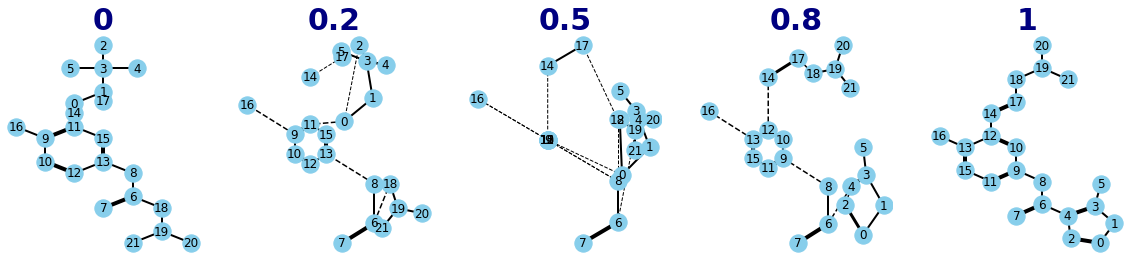

In [6]:
pos1p = gnode.node_vec_pos(G1p)
pos2p = gnode.node_vec_pos(G2p)

A1 = nx.to_numpy_matrix(G1p)
A2 = nx.to_numpy_matrix(G2p)
A1p = gmatch.permutate_adjmat(p,A1)

A_geod, G_geod, pos_geo = [], [], []
M = 5
s = [0,.25,.5,.75,1]
for i in range(M):
    A_geod.append((1-s[i])*A1p + s[i]*A2 )
    G_geod.append( nx.from_numpy_matrix(A_geod[-1]) )
    pos_geoi = dict()
    for k in pos1p:
        pos_geoi[k] = ((1-s[i])*pos1p[k][0]+s[i]*pos2p[k][0], (1-s[i])*pos1p[k][1]+s[i]*pos2p[k][1])
    pos_geo.append(pos_geoi)

plt.figure(figsize=(20,4))
gt1,gt2 = .9,.4
for i in range(M):
    plt.subplot(1,M,i+1)
    gplot.draw_weighted(G_geod[i],str(round(s[i],1)), pos=pos_geo[i], width_factor=2, 
                  thr=gt1, thr2=gt2)

**Active:Linear Interpolation**

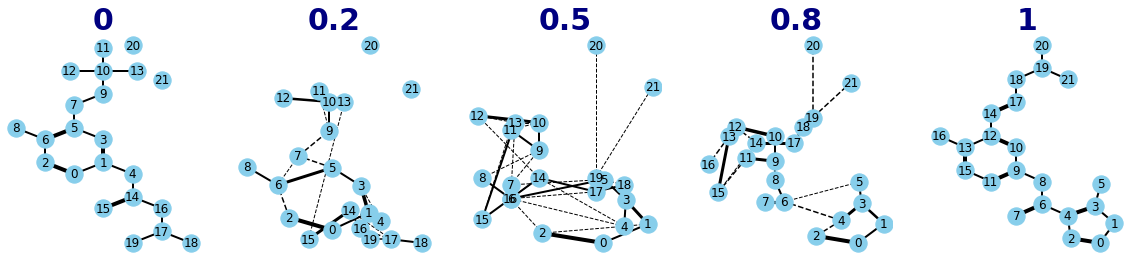

In [7]:
A1 = nx.to_numpy_matrix(G1)
A2 = nx.to_numpy_matrix(G2)

n1, n2 = len(A1), len(A2)
temp = np.zeros(shape = (max(n1,n2),max(n1,n2)))
if n1>n2:
    temp[:n2,:n2] = A2.copy()
    A2 = temp.copy()
    for i in range(n2,n1):
        pos2[i] = pos1[i]
elif n1<n2:
    temp[:n1,:n1] = A1.copy()
    A1 = temp.copy()
    for i in range(n1,n2):
        pos1[i] = pos2[i]

A_geod, G_geod, pos_geo = [], [], []
for i in range(M):
    A_geod.append((1-s[i])*A1 + s[i]*A2 )
    G_geod.append( nx.from_numpy_matrix(A_geod[-1]) )
    pos_geoi = dict()
    for k in pos1:
        pos_geoi[k] = ((1-s[i])*pos1[k][0]+s[i]*pos2[k][0], (1-s[i])*pos1[k][1]+s[i]*pos2[k][1])
    pos_geo.append(pos_geoi)

plt.figure(figsize=(20,4))
gt1,gt2 = .9,.4
for i in range(M):
    plt.subplot(1,M,i+1)
    gplot.draw_weighted(G_geod[i],str(round(s[i],1)), pos=pos_geo[i], width_factor=2, 
                  thr=gt1, thr2=gt2)

**Inactive: Geodesic**

In [8]:
i1,i2 = 194, 82
G1 = G_train[i1]
G2 = G_train[i2]
pos1 = pos_train[i1]
pos2 = pos_train[i2]

w = 1
G1p,G2p,p,d, d0 = gmatch.match_extended_nx(G1,G2,two_way=True,w=w,use_node=gnode.node_binary_dists,attr='symbol')
print(d0,d)

5.5677643628300215 3.0


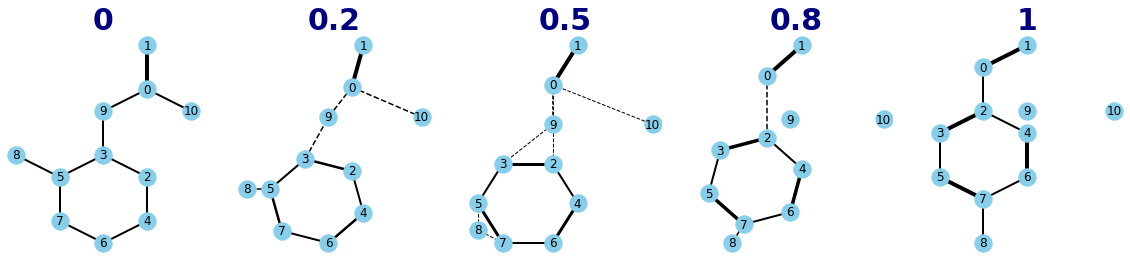

In [9]:
pos1p = gnode.node_vec_pos(G1p)
pos2p = gnode.node_vec_pos(G2p)

A1 = nx.to_numpy_matrix(G1p)
A2 = nx.to_numpy_matrix(G2p)
A1p = gmatch.permutate_adjmat(p,A1)

A_geod, G_geod, pos_geo = [], [], []
M = 5
s = [0,.25,.5,.75,1]
for i in range(M):
    A_geod.append((1-s[i])*A1p + s[i]*A2 )
    G_geod.append( nx.from_numpy_matrix(A_geod[-1]) )
    pos_geoi = dict()
    for k in pos1p:
        pos_geoi[k] = ((1-s[i])*pos1p[k][0]+s[i]*pos2p[k][0], (1-s[i])*pos1p[k][1]+s[i]*pos2p[k][1])
    pos_geo.append(pos_geoi)

plt.figure(figsize=(20,4))
gt1,gt2 = .9,.4
for i in range(M):
    plt.subplot(1,M,i+1)
    gplot.draw_weighted(G_geod[i],str(round(s[i],1)), pos=pos_geo[i], width_factor=2, 
                  thr=gt1, thr2=gt2)

**Active:Linear Interpolation**

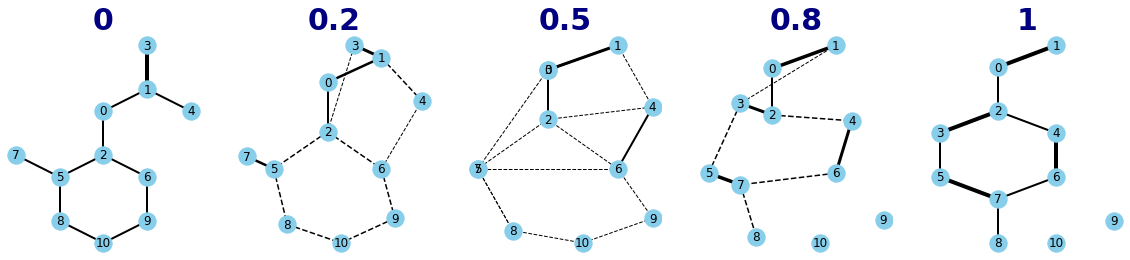

In [10]:
A1 = nx.to_numpy_matrix(G1)
A2 = nx.to_numpy_matrix(G2)

n1, n2 = len(A1), len(A2)
temp = np.zeros(shape = (max(n1,n2),max(n1,n2)))
if n1>n2:
    temp[:n2,:n2] = A2.copy()
    A2 = temp.copy()
    for i in range(n2,n1):
        pos2[i] = pos1[i]
elif n1<n2:
    temp[:n1,:n1] = A1.copy()
    A1 = temp.copy()
    for i in range(n1,n2):
        pos1[i] = pos2[i]

A_geod, G_geod, pos_geo = [], [], []
for i in range(M):
    A_geod.append((1-s[i])*A1 + s[i]*A2 )
    G_geod.append( nx.from_numpy_matrix(A_geod[-1]) )
    pos_geoi = dict()
    for k in pos1:
        pos_geoi[k] = ((1-s[i])*pos1[k][0]+s[i]*pos2[k][0], (1-s[i])*pos1[k][1]+s[i]*pos2[k][1])
    pos_geo.append(pos_geoi)

plt.figure(figsize=(20,4))
gt1,gt2 = .9,.4
for i in range(M):
    plt.subplot(1,M,i+1)
    gplot.draw_weighted(G_geod[i],str(round(s[i],1)), pos=pos_geo[i], width_factor=2, 
                  thr=gt1, thr2=gt2)

## Statistical Analysis

### Active

In [11]:
G = G_train[y_train==1]
pos = pos_train[y_train==1]

use_node = False
attr = 'v'
num_attr = True
w = 0

**Sample Graphs**

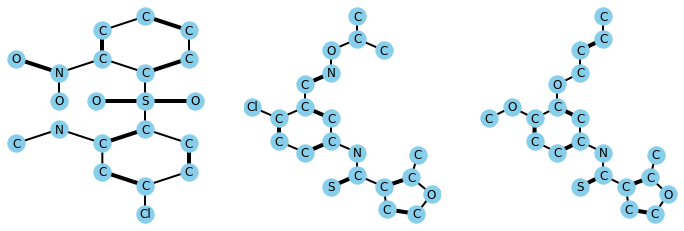

In [12]:
nr,nc = 1,3
wd = 12
sz11 = (wd,1.*wd*nr/nc)
plt.figure('First 3 Sample Graphs',figsize=sz11)
for k in range(nr*nc):
    plt.subplot(nr,nc,k+1)
    k += 10
    gplot.draw_weighted(G[k],pos=pos[k],width_factor = 2,label_name = 'symbol')

**Mean**

In [13]:
M = 3
muG,Gp,E,mu_list,P = gstat.iterative_mean_graph_ext_nx(G,max_itr=M, 
                                                       use_node=use_node,w=w,num_attr=num_attr,attr=attr,
                                                       algo='faq')

first pass: muG has 81 nodes


/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 2.220446049250313e-16
  warnings.warn(message)


first pass time: 1.85s
starting iteration 1/3, muG has 81 nodes


/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 6.938893903907228e-17
  warnings.warn(message)


finished iteration 1/3 and time so far 1.43s
starting iteration 2/3, muG has 81 nodes


/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 1.3877787807814457e-17
  warnings.warn(message)


finished iteration 2/3 and time so far 3.13s
starting iteration 3/3, muG has 81 nodes


/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 5.551115123125783e-17
  warnings.warn(message)
/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 8.049116928532385e-16
  warnings.warn(message)
/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 2.498001805406602e-16
  warnings.warn(message)
/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 9.228728892196614e-16
  warnings.warn(message)
/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 8.326672684688674e-17
  warnings.warn(message)


finished iteration 3/3 and time so far 4.64s


**PCA**

In [14]:
pca,scores,V= gstat.pcaG_aligned_edge(Gp,P)
pc_sd = np.sqrt(pca.explained_variance_)

n = muG.number_of_nodes()

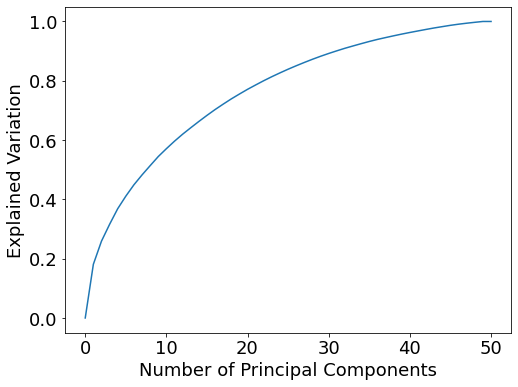

In [15]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variation')
plt.show()

**Reconstruction**

In [16]:
p70,p80,p90=None,None,None
for i in range(1,35):
    tmp = sum(pca.explained_variance_ratio_[0:i])
    #print(i,tmp)
    if tmp>0.7 and not p70:
        p70 = i
    if tmp>0.8 and not p80:
        p80 = i
    if tmp>0.9 and not p90:
        p90 = i
        

print(p70,p80,p90)

16 22 31


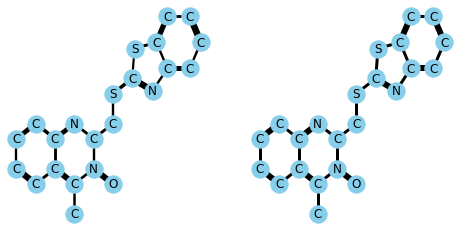

In [17]:
i = 15
sparse_score = scores[i].copy()
sparse_score[p80:] = 0
sparse_score = np.reshape(sparse_score,(1,min(n,len(G))))

recon_graph = gstat.pca_scores_to_graphs_structure(pca,sparse_score)[0]

for nd in recon_graph:
    recon_graph.nodes[nd].update(Gp[i].nodes[nd])

thr = 0.35
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
gplot.draw_weighted(gplot.remove_weak_nodes(recon_graph,thr=thr),pos=gnode.node_vec_pos(Gp[i]),width_factor=3,label_name='symbol')
plt.subplot(1,2,2)
gplot.draw_weighted(gplot.remove_weak_nodes(Gp[i],thr=thr),pos=gnode.node_vec_pos(Gp[i]),width_factor=3, label_name='symbol')

In [18]:
gplot.remove_weak_nodes(recon_graph,thr=thr,verbose=True)

removed 96.51% weak edges
removed 9.487934731721541% weights


### Inactive

In [19]:
G = G_train[y_train==0]
pos = pos_train[y_train==0]

**Sample Graphs**

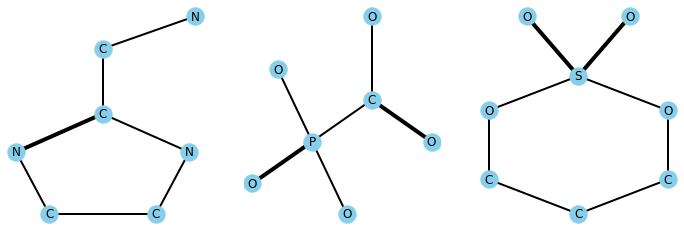

In [20]:
nr,nc = 1,3
wd = 12
sz11 = (wd,1.*wd*nr/nc)
plt.figure('First 3 Sample Graphs',figsize=sz11)
for k in range(nr*nc):
    plt.subplot(nr,nc,k+1)
    k += 10
    gplot.draw_weighted(G[k],pos=pos[k],width_factor = 2, label_name = 'symbol')

**Mean**

In [25]:
w = 1
M = 3
muG,Gp,E,mu_list, P = gstat.iterative_mean_graph_ext_nx(G, max_itr=M, 
                                                        use_node=gnode.node_square_dists,w=w,num_attr=True,attr='attr',
                                                        algo='faq')

first pass: muG has 12 nodes
first pass time: 1.27s
starting iteration 1/3, muG has 12 nodes


/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 2.7755575615628914e-17
  warnings.warn(message)
/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 2.220446049250313e-16
  warnings.warn(message)


finished iteration 1/3 and time so far 1.19s
starting iteration 2/3, muG has 12 nodes


/Users/Xiaoyang/Dropbox/GraphMetrics/code/gm/faq.py:193: UserWarning: Nonimproving Direction, <d,g> = 1.1102230246251565e-16
  warnings.warn(message)


finished iteration 2/3 and time so far 2.49s
starting iteration 3/3, muG has 12 nodes
finished iteration 3/3 and time so far 3.67s


**PCA**

In [26]:
pca,scores,V= gstat.pcaG_aligned(Gp,P,attr='attr')
pc_sd = np.sqrt(pca.explained_variance_)

n = muG.number_of_nodes()
d = muG.nodes[0]['attr'].size

graphs are equal size


Text(0, 0.5, 'Explained Variation')

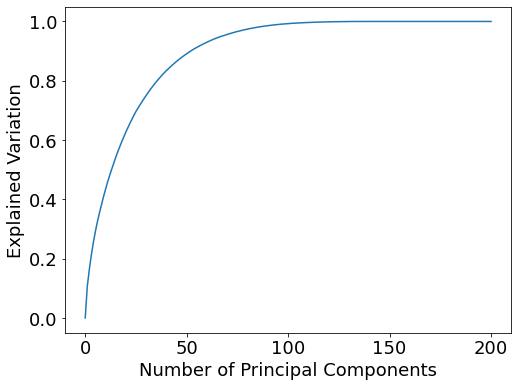

In [28]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variation')

In [29]:
p70,p80,p90=None,None,None
for i in range(1,200):
    tmp = sum(pca.explained_variance_ratio_[0:i])
    #print(i,tmp)
    if tmp>0.7 and not p70:
        p70 = i
    if tmp>0.8 and not p80:
        p80 = i
    if tmp>0.9 and not p90:
        p90 = i
        

print(p70,p80,p90)

26 36 52


**Gaussion Model**

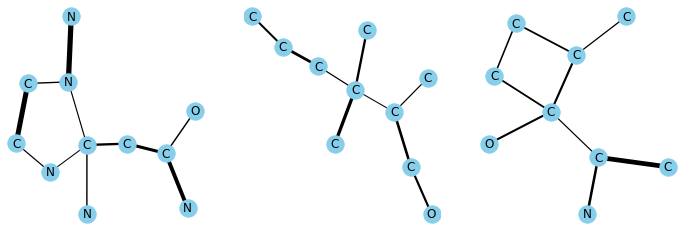

In [31]:
mu = np.mean(scores[:,:p80],axis = 0)
C = np.cov(scores[:,:p80],rowvar =False)

rs = np.random.multivariate_normal(mu,C,3)

Grs = gstat.pca_scores_to_graphs(pca,rs,muG.number_of_nodes(),d)
Grs = [gplot.remove_weak_nodes(g,0.5) for g in Grs]
for g in Grs:
    for nd in g.nodes:
        g.nodes[nd]['symbol'] = vec2nodes[np.argmax(g.nodes[nd]['v'])]

plt.figure('Random Sample',figsize=(12,4))
for k in range(len(Grs)):
    plt.subplot(1,3,k+1)
    gplot.draw_weighted(Grs[k],width_factor=2,label_name='symbol')